<a href="https://colab.research.google.com/github/Ravindra1289/DL/blob/main/DL_EXP02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

(X_train, y_train),(X_test, y_test)=imdb.load_data(num_words=100000)
maxlen=500
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=40, batch_size=512)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4946 - loss: 2148.4758 - val_accuracy: 0.5034 - val_loss: 145.2379
Epoch 2/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4990 - loss: 548.1315 - val_accuracy: 0.4998 - val_loss: 21.6384
Epoch 3/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4952 - loss: 179.2211 - val_accuracy: 0.5042 - val_loss: 1.2854
Epoch 4/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5132 - loss: 60.2099 - val_accuracy: 0.4992 - val_loss: 0.8680
Epoch 5/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5092 - loss: 26.1834 - val_accuracy: 0.4996 - val_loss: 0.7288
Epoch 6/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5075 - loss: 16.4335 - val_accuracy: 0.4997 - val_loss: 0.7593
Epoch 7/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5081 - loss: 11.0623 - val_accuracy: 0.5011 - val_loss: 0.8100
Epoch 8/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4955 - loss: 8.8612 - val_accura

In [ ]:
from sklearn.metrics import classification_report
y_pred=(model.predict(X_test)>0.5).astype ("int32")
print(classification_report(y_test,y_pred,target_names=["Negative","positive"]))

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

    Negative       0.50      0.99      0.66     12500
    positive       0.51      0.01      0.02     12500

    accuracy                           0.50     25000
   macro avg       0.51      0.50      0.34     25000
weighted avg       0.51      0.50      0.34     25000



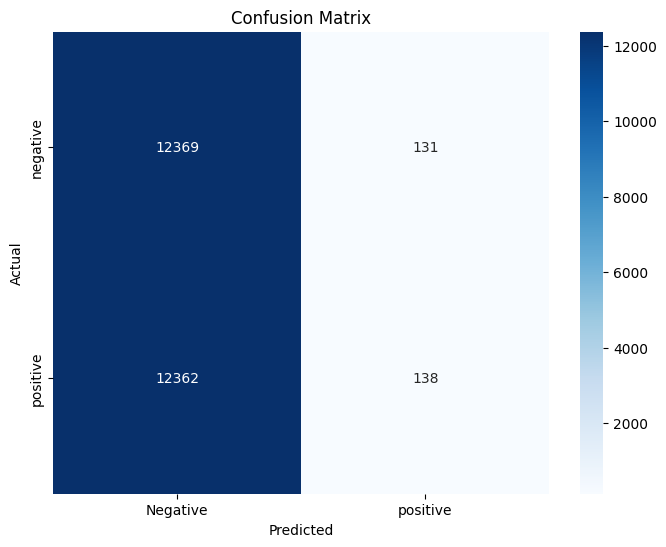

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=["Negative","positive"],yticklabels=["negative","positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()